# Example: Pandas
Created by Victoria Catlett for the Intermediate Python 3 Workshop

### Import what you need from packages at the top

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

### Define a function we'll need later

In [2]:
def mySin(x,a,b):
    y = a*np.sin(b*x)
    return y

### Read in the Excel file OR the CSV file

In [3]:
data = pd.read_excel('../files/pandas.xlsx')  # Try reading in pandas.csv instead
x = data.x 
y = data['y']  # Notice that there are two ways of accessing the columns of 'data'

### Plot the data to see what it looks like
### Then find a, b, and c of the best-fit mySin function

The fit found y = 0.74*sin(6.28*x)
The real answer is y = 0.75*sin(2*pi*x)


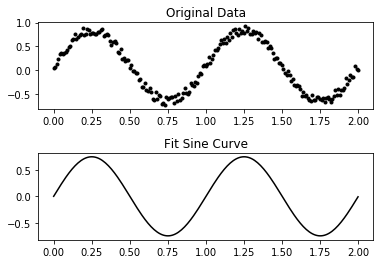

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.5)
ax[0].plot(x, y, 'k.')
ax[0].set_title('Original Data')

parameters, cov = curve_fit(mySin, x, y, p0=[1, 6])
a_fit = parameters[0]
b_fit = parameters[1]
y_fit = mySin(x, a_fit, b_fit)
ax[1].plot(x, y_fit, 'k')
ax[1].set_title('Fit Sine Curve')

print('The fit found y = %0.2f*sin(%0.2f*x)'%(a_fit,b_fit))
print('The real answer is y = 0.75*sin(2*pi*x)')

### Save new data to a file

In [10]:
# One way: Add columns to the original dataframe, save as Excel sheet
data['y_fit'] = y_fit
data.to_excel('../files/pandas_fit.xlsx', index=False)

# Another way: Make a new dataframe, save as CSV
saveData = pd.DataFrame({'x':x, 'y':y, 'y_fit':y_fit})
saveData.to_csv('../files/pandas_fit.csv', index=False)